# <center> <font color=#FF00FF	>Compte rendu TP2</font></center>




# Partie 1
## <font color=#00FF00> État 1: image + clustering</font>

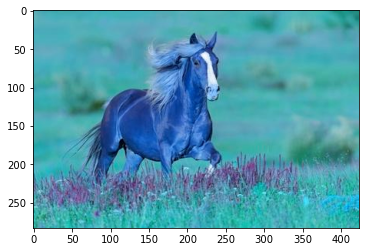

In [46]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('cheval.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 22)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('cheval22.jpg', quant)
plt.imshow(image)

cv2.imread('cheval.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

## <font color=#9683EC>*Conclusion:*</font>
### <font color=#002FA7>Lorsque j'augmente le nombre de clasteur je rapproche l'image initiale</font>

# Partie 2
## <font color=#00FF00> État 2: image + Bruit +clustering</font>

#### *On va ajouter un bruit ("gaussian") a notre image puis on faire l'alogithem de KMeans et on voir le résultat*

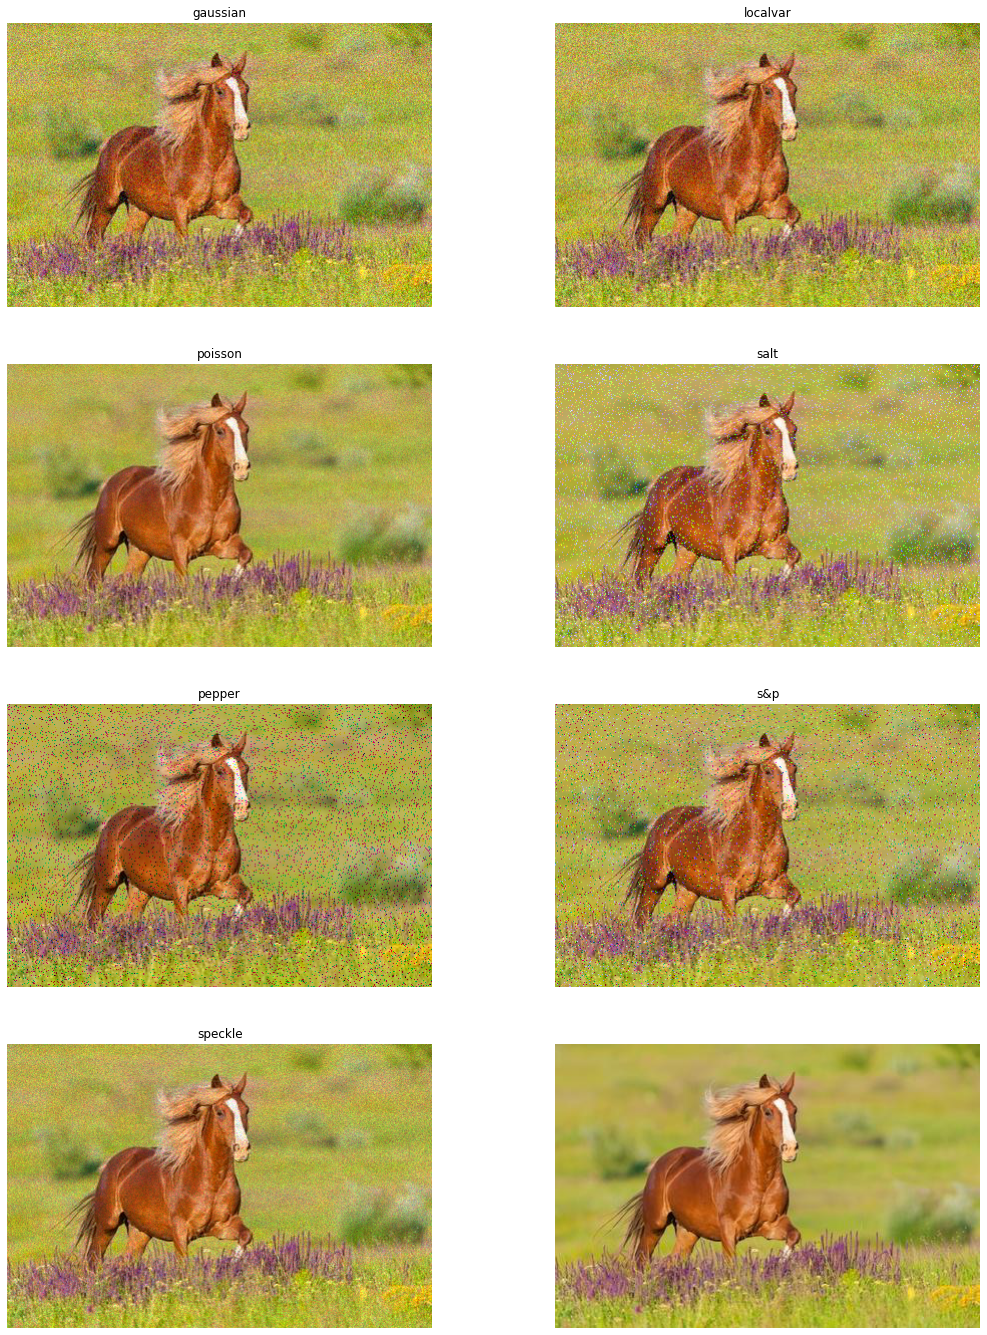

In [54]:
import skimage.io
import matplotlib.pyplot as plt
img_path="cheval.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        plt.imsave("chevalbruit.jpg",gimg)
        
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))

r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)

plt.show()


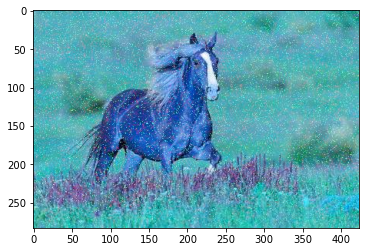

In [51]:
image = cv2.imread('chevalbruit.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 20)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('chevalbruitClust20.jpg', quant)
plt.imshow(image)

cv2.imread('chevalbruit.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

## <font color=#9683EC>*Conclusion:*</font>
#### <font color=#002FA7> Le buit présente un défaut parasite qui dégrade la qualité de l'image, un peu comme le grain en photo argentique.</font>
#### <font color=#002FA7> C'est un bruit de chrominance car il est formé par une composante colorée des pixels bruités, il est visible sous la forme de taches de couleurs aléatoires.</font>

# Partie 3
## <font color=#00FF00> État 3: image + Bruit(salt) + algorithme (filtre) que élimine le bruit +clustering</font>


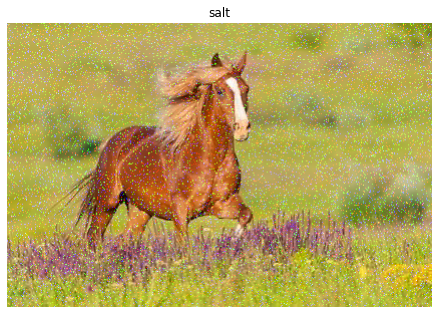

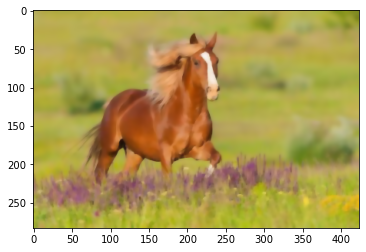

In [59]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
# Apply total variation filter denoising
img_path="cheval.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "salt", r,c,3)
plt.show()
denoised_image = denoise_tv_chambolle(img,
weight=0.1,
multichannel=True)
plt.imshow(denoised_image)




## <font color=#9683EC>*Conclusion:*</font>
#### <font color=#002FA7> En éliminant les défauts et les bruits l'image initiale est restaurée et l'infrmation devient de plus en plus claire ...</font>